In [1]:
# 导入所需库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sas7bdat import SAS7BDAT
with SAS7BDAT('D:\\课件\\机器学习与数据挖掘\\数据集\\4---贷款信用风险评分\\credit_mini.sas7bdat', skip_header=False) as reader:
    data = reader.to_data_frame()

In [3]:
feature_chinese=pd.read_excel('D:\\课件\\机器学习与数据挖掘\\数据集\\4---贷款信用风险评分\\字段说明.xlsx')

In [127]:
print(data['bad_good'].value_counts())
print(data['bad_good'].mean())
data.head()

0.0    76933
1.0     3067
Name: bad_good, dtype: int64
0.0383375


,CUST_ID,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,...,L3_CHANNEL_TXN_DTAIN_AVGCNT,L3_CHANNEL_TXN_DOUTTA_AVGCNT,L6_CHANNEL_TXN_STAIN_AVGAMT,L6_CHANNEL_TXN_SOUTTA_AVGAMT,L6_CHANNEL_TXN_DTAIN_AVGAMT,L6_CHANNEL_TXN_DOUTTA_AVGAMT,L6_CHANNEL_TXN_STAIN_AVGCNT,L6_CHANNEL_TXN_SOUTTA_AVGCNT,L6_CHANNEL_TXN_DTAIN_AVGCNT,L6_CHANNEL_TXN_DOUTTA_AVGCNT
0,1.000000e+09,1101.0,ZR01,1,0.0,0.0,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000003e+09,602.0,ZR01,2,0.0,10.0,47466.73,46687.603333,23343.801667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000003e+09,606.0,ZR01,2,0.0,0.0,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000005e+09,602.0,ZR01,2,0.0,33.0,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000005e+09,602.0,ZR01,1,0.0,0.0,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 627 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           80000 non-null  float64
 1   OPEN_ORG_NUM                      80000 non-null  float64
 2   IDF_TYP_CD                        80000 non-null  object 
 3   GENDER                            80000 non-null  object 
 4   bad_good                          80000 non-null  float64
 5   LAST_OPEN_TENURE_DAYS             80000 non-null  float64
 6   G_OS_PRCP_SUM                     80000 non-null  float64
 7   OS_PRCP_SUM_THREE                 80000 non-null  float64
 8   OS_PRCP_SUM_SIX                   80000 non-null  float64
 9   guozhai_flag                      80000 non-null  float64
 10  L3_DR_AMT                         80000 non-null  float64
 11  L3_DR_CNT                         80000 non-null  float64
 12  DR_

# 数据预处理

## 剔除无关特征

In [6]:
# 列数据筛选
#去除客户号，机构号，只有一个值的列类型
data_droped = data.drop(['CUST_ID','OPEN_ORG_NUM','IDF_TYP_CD'], 1)
for col in data_droped.columns:
    if len(data_droped[col].unique()) == 1:
        data_droped.drop(col,inplace=True,axis=1)

## object类型处理

观察取值

In [7]:
pd.Series({c: data_droped[c].unique() for c in data_droped.select_dtypes(include=['object'])})

GENDER                             [1, 2, X]
CUST_EUP_ACCT_FLAG                    [N, Y]
CUST_AU_ACCT_FLAG                     [N, Y]
CUST_SALARY_FINANCIAL_FLAG            [N, Y]
CUST_DOLLER_FLAG                      [Y, N]
CUST_INTERNATIONAL_GOLD_FLAG          [N, Y]
CUST_INTERNATIONAL_COMMON_FLAG        [N, Y]
CUST_INTERNATIONAL_SIL_FLAG           [Y, N]
CUST_INTERNATIONAL_DIAMOND_FLAG       [N, Y]
CUST_GOLD_COMMON_FLAG                 [N, Y]
CUST_STAD_PLATINUM_FLAG               [N, Y]
CUST_LUXURY_PLATINUM_FLAG             [N, Y]
CUST_PLATINUM_FINANCIAL_FLAG          [N, Y]
CUST_DIAMOND_FLAG                     [N, Y]
CUST_BUSINESS_FLAG                    [N, Y]
DEP_SA_FLAG                           [Y, N]
DEP_TD_FLAG                           [N, Y]
LOAN_FLAG                             [N, Y]
FUND_FLAG                             [N, 1]
C_FUND_FLAG                        [N, 0, 1]
D_FUND_FLAG                        [N, 0, 1]
S_FUND_FLAG                        [N, 0, 1]
BOND_FLAG 

缺失值处理

In [8]:
# 目标在性别缺失值与未缺失值上的分布
print(data[data['GENDER'] == 'X']['bad_good'].value_counts())
print(data[data['GENDER'] != 'X']['bad_good'].value_counts())
# 性别属于完全随机丢失，直接删除对结果无影响
data_droped = data_droped[data_droped['GENDER'] != 'X']

0.0    686
1.0     36
Name: bad_good, dtype: int64
0.0    76247
1.0     3031
Name: bad_good, dtype: int64


稀缺值处理

In [9]:
print('FUND_FLAG','取值为N的样本')
print(data[data['FUND_FLAG'] == 'N']['bad_good'].value_counts(),'违约率:',data[data['FUND_FLAG'] == 'N']['bad_good'].mean())
print("取值为1的样本")
print(data[data['FUND_FLAG'] == '1']['bad_good'].value_counts(),'违约率:',data[data['FUND_FLAG'] == '1']['bad_good'].mean())
for i in ['C_FUND_FLAG','D_FUND_FLAG','S_FUND_FLAG'] :
    print('\n',i,'取值为0的样本')
    print(data[data[i] == '0']['bad_good'].value_counts(),'违约率:',data[data[i] == '0']['bad_good'].mean())
    print("取值为1的样本")
    print(data[data[i] == '1']['bad_good'].value_counts(),'违约率:',data[data[i] == '1']['bad_good'].mean())
    print("取值为N的样本")
    print(data[data[i] == 'N']['bad_good'].value_counts(),'违约率:',data[data[i] == 'N']['bad_good'].mean())
# 持有货币型基金标志、持有偏债型基金标志、持有偏股型基金标志 都有0、1、N三种取值
# 可以看出0和N的违约率较为接近但0值的违约率都高于N，可近似合并


FUND_FLAG 取值为N的样本
0.0    70258
1.0     2775
Name: bad_good, dtype: int64 违约率: 0.037996522120137474
取值为1的样本
0.0    6675
1.0     292
Name: bad_good, dtype: int64 违约率: 0.0419118702454428

 C_FUND_FLAG 取值为0的样本
0.0    6317
1.0     283
Name: bad_good, dtype: int64 违约率: 0.04287878787878788
取值为1的样本
0.0    358
1.0      9
Name: bad_good, dtype: int64 违约率: 0.02452316076294278
取值为N的样本
0.0    70258
1.0     2775
Name: bad_good, dtype: int64 违约率: 0.037996522120137474

 D_FUND_FLAG 取值为0的样本
0.0    6569
1.0     291
Name: bad_good, dtype: int64 违约率: 0.042419825072886296
取值为1的样本
0.0    106
1.0      1
Name: bad_good, dtype: int64 违约率: 0.009345794392523364
取值为N的样本
0.0    70258
1.0     2775
Name: bad_good, dtype: int64 违约率: 0.037996522120137474

 S_FUND_FLAG 取值为0的样本
0.0    6336
1.0     274
Name: bad_good, dtype: int64 违约率: 0.041452344931921334
取值为1的样本
0.0    339
1.0     18
Name: bad_good, dtype: int64 违约率: 0.05042016806722689
取值为N的样本
0.0    70258
1.0     2775
Name: bad_good, dtype: int64 违约率: 0.0379965221201

In [10]:
for i in ['FUND_FLAG','C_FUND_FLAG','D_FUND_FLAG','S_FUND_FLAG'] :
    data_droped[i] = data_droped[i].replace(['0','1'],'Y')

object类型转bool

In [11]:
data_droped['GENDER']=(data_droped['GENDER']=='1')
for i in list(data_droped.select_dtypes(include=['object']).columns)[1:]:
    data_droped[i]=(data_droped[i]=='Y')
data_droped['CUST_EUP_ACCT_FLAG']=data_droped['CUST_EUP_ACCT_FLAG']=='Y'

## float数据类型处理

In [13]:
# from sklearn.feature_selection import VarianceThreshold

# #方差选择法，返回值为特征选择后的数据
# #参数threshold为方差的阈值
# VarianceThreshold(threshold=3).fit_transform(x,y)

In [14]:
data2=data_droped

In [15]:
y=data2['bad_good']
x=data2.drop('bad_good', 1)

# 描述性统计

## 特征属性与数据特征

In [16]:
# 记录特征名
feature_name=x.columns.values.tolist()

特征属性

In [17]:
data2.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79278 entries, 0 to 79999
Data columns (total 520 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GENDER                            79278 non-null  bool   
 1   bad_good                          79278 non-null  float64
 2   LAST_OPEN_TENURE_DAYS             79278 non-null  float64
 3   G_OS_PRCP_SUM                     79278 non-null  float64
 4   OS_PRCP_SUM_THREE                 79278 non-null  float64
 5   OS_PRCP_SUM_SIX                   79278 non-null  float64
 6   guozhai_flag                      79278 non-null  float64
 7   L3_DR_AMT                         79278 non-null  float64
 8   L3_DR_CNT                         79278 non-null  float64
 9   DR_AMT                            79278 non-null  float64
 10  DR_CNT                            79278 non-null  float64
 11  L3_CR_AMT                         79278 non-null  float64
 12  L3_

观察数据稀疏程度

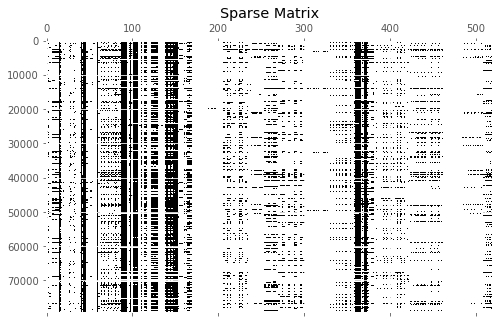

In [18]:
plt.figure(figsize=(8,5))
plt.spy(data2.values,aspect='auto')
plt.title("Sparse Matrix");

观察数字特征

In [19]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['总数','最小值','最小值位置','25%分位数',
                    '中位数','75%分位数','均值','最大值','最大值位数','平均绝对偏差','方差','标准差','偏度','峰度'])

In [20]:
data2.apply(status)
# 部分特征偏度与峰度都很大，

,GENDER,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,...,CHANNEL_AUTO_DTAIN_CNT,CHANNEL_AUTO_DOUTTA_CNT,L3_CHANNEL_AUTO_DTAIN_AVGAMT,L3_CHANNEL_AUTO_DOUTTA_AVGAMT,L3_CHANNEL_AUTO_DTAIN_AVGCNT,L3_CHANNEL_AUTO_DOUTTA_AVGCNT,L6_CHANNEL_AUTO_DTAIN_AVGAMT,L6_CHANNEL_AUTO_DOUTTA_AVGAMT,L6_CHANNEL_AUTO_DTAIN_AVGCNT,L6_CHANNEL_AUTO_DOUTTA_AVGCNT
总数,79278,79278.000000,79278.000000,7.927800e+04,7.927800e+04,7.927800e+04,79278.000000,7.927800e+04,79278.000000,7.927800e+04,...,79278.000000,79278.000000,7.927800e+04,7.927800e+04,79278.000000,79278.000000,7.927800e+04,7.927800e+04,79278.000000,79278.000000
最小值,False,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
最小值位置,1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,1.000000e+00,0.000000e+00,1.000000,0.000000,1.000000e+00,0.000000e+00,1.000000,0.000000
25%分位数,0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
中位数,1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%分位数,1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
均值,0.519703,0.038233,2.967646,2.364287e+04,2.306715e+04,1.153358e+04,0.000303,6.365997e+05,2.167701,2.197574e+05,...,0.157711,0.232788,1.077230e+03,1.258876e+03,0.216941,0.330050,7.596215e+02,9.083879e+02,0.153777,0.231462
最大值,True,1.000000,88.000000,2.398000e+07,2.398000e+07,1.199000e+07,1.000000,8.906598e+08,1336.000000,2.407876e+08,...,90.000000,103.000000,6.666667e+05,2.669667e+06,126.000000,187.000000,4.749998e+05,1.669667e+06,102.000000,139.500000
最大值位数,0,48.000000,15967.000000,7.815000e+03,7.815000e+03,7.815000e+03,2540.000000,7.934000e+04,34733.000000,7.696000e+03,...,53017.000000,53017.000000,3.711400e+04,5.940000e+02,23438.000000,23438.000000,4.060800e+04,4.566300e+04,23438.000000,23438.000000
平均绝对偏差,0.499224,0.073542,4.989627,4.450775e+04,4.342409e+04,2.171204e+04,0.000605,1.087724e+06,3.534761,3.889386e+05,...,0.295719,0.423235,1.885560e+03,2.128798e+03,0.371628,0.524787,1.303407e+03,1.505939e+03,0.255458,0.359034


## 重要特征观察

### 梯度提升树进行特征选择

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
selector=SelectFromModel(GradientBoostingClassifier()).fit(x,y)

In [22]:
x_GBDT=selector.transform(x)

In [23]:
k=0
for i in range(len(selector.get_support())):
    if selector.get_support()[i]==True:
        k+=1
        print(feature_name[i])
k

G_OS_PRCP_SUM
LOAN_FLAG


2

### 违约相关重要特征分布

先看LOAN_FLAG 个贷标识

In [24]:
data2['LOAN_FLAG'].dtype

dtype('bool')

<AxesSubplot:xlabel='LOAN_FLAG', ylabel='count'>

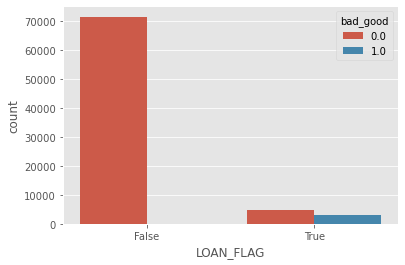

In [25]:
sns.countplot(x ='LOAN_FLAG', hue = 'bad_good', data = data2)

In [26]:
data2[data2['LOAN_FLAG']==False]['bad_good'].value_counts()
# 未借贷的人均未违约

0.0    71526
Name: bad_good, dtype: int64

In [27]:
data2['bad_good'].value_counts()

0.0    76247
1.0     3031
Name: bad_good, dtype: int64

LOAN_FLAG值表示借贷与否。若为False,则必然不会违约

故只需要对借贷值为True的样本建立模型，发掘信用决定因素

In [28]:
# 发生借贷的样本
data3=data2[data2['LOAN_FLAG']==True]
data3= data3.drop('LOAN_FLAG', 1)
y=data3['bad_good']
x=data2.drop('bad_good', 1)
print("data3.shape:",data3.shape)
print(data3.info(verbose=True, null_counts=True))
data3.describe()

data3.shape: (7752, 519)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7752 entries, 1 to 79987
Data columns (total 519 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GENDER                            7752 non-null   bool   
 1   bad_good                          7752 non-null   float64
 2   LAST_OPEN_TENURE_DAYS             7752 non-null   float64
 3   G_OS_PRCP_SUM                     7752 non-null   float64
 4   OS_PRCP_SUM_THREE                 7752 non-null   float64
 5   OS_PRCP_SUM_SIX                   7752 non-null   float64
 6   guozhai_flag                      7752 non-null   float64
 7   L3_DR_AMT                         7752 non-null   float64
 8   L3_DR_CNT                         7752 non-null   float64
 9   DR_AMT                            7752 non-null   float64
 10  DR_CNT                            7752 non-null   float64
 11  L3_CR_AMT                         7752 non

,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,...,CHANNEL_AUTO_DTAIN_CNT,CHANNEL_AUTO_DOUTTA_CNT,L3_CHANNEL_AUTO_DTAIN_AVGAMT,L3_CHANNEL_AUTO_DOUTTA_AVGAMT,L3_CHANNEL_AUTO_DTAIN_AVGCNT,L3_CHANNEL_AUTO_DOUTTA_AVGCNT,L6_CHANNEL_AUTO_DTAIN_AVGAMT,L6_CHANNEL_AUTO_DOUTTA_AVGAMT,L6_CHANNEL_AUTO_DTAIN_AVGCNT,L6_CHANNEL_AUTO_DOUTTA_AVGCNT
count,7752.000000,7752.000000,7.752000e+03,7.752000e+03,7.752000e+03,7752.0,7.752000e+03,7752.000000,7.752000e+03,7752.000000,...,7752.000000,7752.000000,7752.000000,7.752000e+03,7752.000000,7752.000000,7752.000000,7.752000e+03,7752.000000,7752.000000
mean,0.390996,3.565918,2.417904e+05,2.359027e+05,1.179513e+05,0.0,7.708924e+05,2.057276,2.971956e+05,0.727038,...,0.190789,0.171311,1265.909750,2.096454e+03,0.256880,0.235595,973.666560,1.489688e+03,0.181824,0.162410
std,0.488005,8.872208,5.912338e+05,5.731781e+05,2.865891e+05,0.0,6.585353e+06,10.368420,3.248581e+06,3.798268,...,0.985302,1.298178,10400.820177,4.831308e+04,0.887129,1.845509,8969.166076,2.734039e+04,0.556891,1.178196
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,9.750000e+04,9.430796e+04,4.715398e+04,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,1.000000,0.000000,2.777542e+05,2.729846e+05,1.364923e+05,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,300.000000,0.000000e+00,0.166667,0.000000
max,1.000000,88.000000,2.398000e+07,2.398000e+07,1.199000e+07,0.0,3.236414e+08,446.000000,1.876632e+08,166.000000,...,52.000000,76.000000,666666.666670,2.669667e+06,45.333333,140.666667,474999.833330,1.334833e+06,22.666667,87.166667


发生借贷的只有7752条样本

再看G_OS_PRCP_SUM 贷款账户月余额

In [29]:
data3['G_OS_PRCP_SUM'].dtype

dtype('float64')

In [30]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()


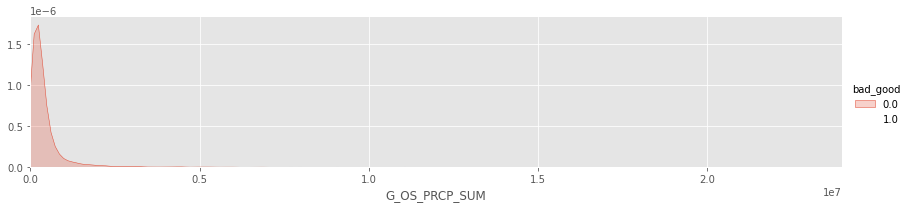

In [31]:
plot_distribution(data3 , var = 'G_OS_PRCP_SUM' , target = 'bad_good')

In [32]:
print("违约用户贷款账户月余额")
print(data3[data2['bad_good']==1]['G_OS_PRCP_SUM'].value_counts())
print("未违约用户贷款账户月余额")
print(data3[data2['bad_good']==0]['G_OS_PRCP_SUM'].value_counts().sort_index())

违约用户贷款账户月余额
0.0    3031
Name: G_OS_PRCP_SUM, dtype: int64
未违约用户贷款账户月余额
349.06         1
535.71         1
615.08         1
716.34         1
1056.88        1
              ..
7649999.00     1
8000000.00     1
9053342.09     1
11041674.72    1
23980000.00    1
Name: G_OS_PRCP_SUM, Length: 4595, dtype: int64


余额为0的账户均违约，余额不为0的账户均未违约

<Figure size 2016x2016 with 0 Axes>

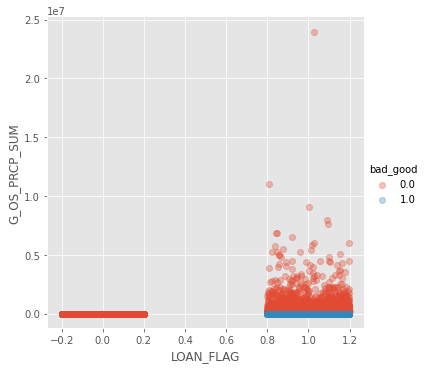

In [33]:
plt.figure(figsize=(28, 28))
sns.lmplot(data = data2.loc[:,['LOAN_FLAG','G_OS_PRCP_SUM','bad_good']],hue="bad_good", x = 'LOAN_FLAG', y = 'G_OS_PRCP_SUM',
          fit_reg = False,x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

从分布可以看出，贷款违约与否('bad_good')可以由['LOAN_FLAG','G_OS_PRCP_SUM']两特征唯一决定。

即只要客户发生贷款且月余额为0的情况与违约一一对应,而月余额不为0或未贷款直接表示不违约

信用评分模型的目标为已知贷款与余额,结合其他特征构建信用评级。所以仅仅根据银行判断违约的规则(借贷且余额为0)判断出违约者是不够的。

必须结合其他特征，以预测潜在违约的可能性为目标建模。

思路有2：

1、如果聚类效果较好。推测用距离相关的算法（knn）可以很好的实现此项功能。与违约样本越接近越可能违约。

2、从回归角度出发，以预测用户月余额为目标。月余额低与违约直接相关，故直接回归估计月余额即可实现违约评级

问题在于评级标准是什么?knn概率?回归按前百分比%确定?

### T-SNE 借贷用户可视化

T-SNE降维可视化，观察借贷用户特征

In [34]:
y=data3['bad_good']
x=data3.drop('bad_good', 1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


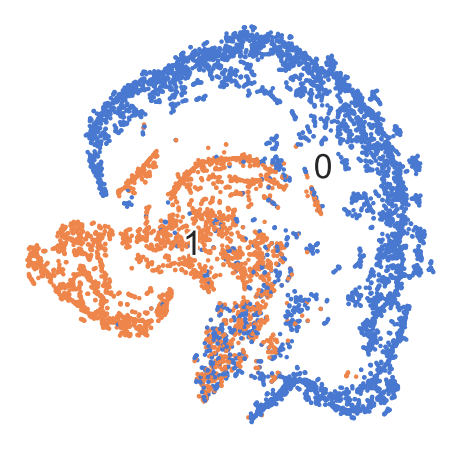

In [35]:
from sklearn.manifold import TSNE

# Random state.
RS = 20180101

import matplotlib.patheffects as PathEffects

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

def scatter(x, colors):
    palette = np.array(sns.color_palette("muted"))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=20,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(3):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=34)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


digits_proj = TSNE(random_state=RS).fit_transform(x)

scatter(digits_proj, y)
foo_fig = plt.gcf()
foo_fig.savefig('demo.eps', format='eps', dpi=1000)
plt.show()

用户违约与否数据分布有明显差异，故分别进行分析

### 月余额相关重要特征分布

使用梯度提升树筛选借贷客户其他特征对月余额的影响

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
y=data3['G_OS_PRCP_SUM']
x=data3.drop(['G_OS_PRCP_SUM','bad_good'], 1)
selector=SelectFromModel(GradientBoostingRegressor()).fit(x,y)

In [39]:
feature_impt=[]
for i in range(len(selector.get_support())):
    if selector.get_support()[i]==True:
        feature_impt.append(feature_name[i])
print(feature_impt)
print([feature_chinese[feature_chinese['名称']==x].iat[0,1] for x in feature_impt])
print(len(feature_impt))

['GENDER', 'LAST_OPEN_TENURE_DAYS', 'G_OS_PRCP_SUM', 'OS_PRCP_SUM_THREE', 'CUST_ASSET_AMT', 'L3_CUST_DEBT_AVG_AMT', 'L6_CUST_SAME_IN_AMT', 'DEP_SA_FLAG', 'DEP_SA_LAST_TENURE_DAYS', 'L6DEP_SA_DAY_MAX_IN_AMT', 'L6DEP_SA_DAY_MAX_OUT_AMT', 'L6_CHANNEL_CTR_IN_MAX_AMT', 'L6_CHANNEL_OTHER_IN_MAX_AMT']
['性别', '信用卡最近开户时长', '贷款账户月余额', '三个月内贷款账户月均余额', '资产总额', '最近3个月客户月平均负债总计', '最近六个月客户跨行同名转入月平均金额', '持有活期产品标志', '活期存款最近开户距今月份', '六个月内单日本币单笔最大转入金额', '六个月内单日本币单笔最大转出金额', '柜面转入六个月内最大交易金额', '其它转入六个月内最大交易金额']
13


In [40]:
feature_val=[]
for i in range(len(selector.get_support())):
    if selector.get_support()[i]==True:
        feature_val.append(selector.estimator_.feature_importances_[i])
print(feature_val)
print(len(feature_val))

[0.002477392681598904, 0.005780827085447568, 0.5038297121826326, 0.34160745739871545, 0.020775389378853443, 0.0610601305048335, 0.0027207736492773187, 0.0028938421741090815, 0.005258496042961037, 0.0035905876139866316, 0.0027985235683686354, 0.004340773193015035, 0.030669529590470618]
13


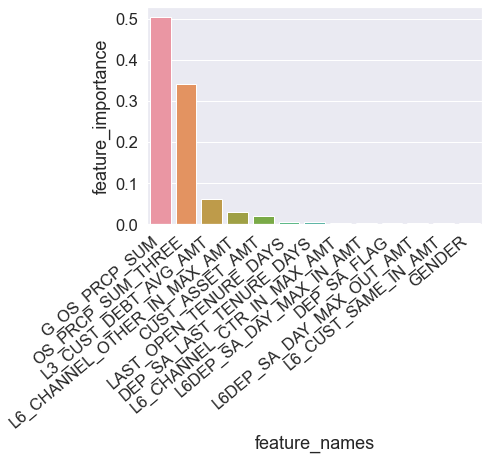

In [41]:
df=pd.DataFrame([feature_impt,feature_val]).sort_values(by=1,axis=1,ascending=False)
df=df.T
df.columns = ['feature_names','feature_importance']
ax=sns.barplot(x='feature_names',y='feature_importance',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

使用梯度提升树筛选所有客户其他特征对月余额的影响

In [42]:
y=data2['G_OS_PRCP_SUM']
x=data2.drop(['LOAN_FLAG','G_OS_PRCP_SUM','bad_good'], 1)
selector=SelectFromModel(GradientBoostingRegressor()).fit(x,y)

In [43]:
feature_impt2=[]
for i in range(len(selector.get_support())):
    if selector.get_support()[i]==True:
        feature_impt2.append(feature_name[i])
print(feature_impt2)
print([feature_chinese[feature_chinese['名称']==x].iat[0,1] for x in feature_impt2])
print(len(feature_impt2))

['G_OS_PRCP_SUM', 'OS_PRCP_SUM_THREE', 'CUST_SALARY_FINANCIAL_FLAG', 'CUST_ASSET_AMT', 'L3_CUST_DEBT_AVG_AMT', 'L6_CUST_SAME_IN_AMT', 'CER_BOND_FLAG', 'CHANNEL_CTR_DEBIT_CNT', 'L6_CHANNEL_CTR_IN_MAX_AMT', 'L6_CHANNEL_OTHER_IN_MAX_AMT']
['贷款账户月余额', '三个月内贷款账户月均余额', '是否薪资理财', '资产总额', '最近3个月客户月平均负债总计', '最近六个月客户跨行同名转入月平均金额', '持有凭证式国债标志', '本期柜面借方交易笔数', '柜面转入六个月内最大交易金额', '其它转入六个月内最大交易金额']
10


In [44]:
feature_val2=[]
for i in range(len(selector.get_support())):
    if selector.get_support()[i]==True:
        feature_val2.append(selector.estimator_.feature_importances_[i])
print(feature_val2)
print(len(feature_val2))

[0.41117005826921194, 0.46617821684097926, 0.002971383800677186, 0.013978969870809247, 0.041897778715810824, 0.005034712645883064, 0.0023975105759416384, 0.005912242013101641, 0.007940812913725578, 0.028633242711239695]
10


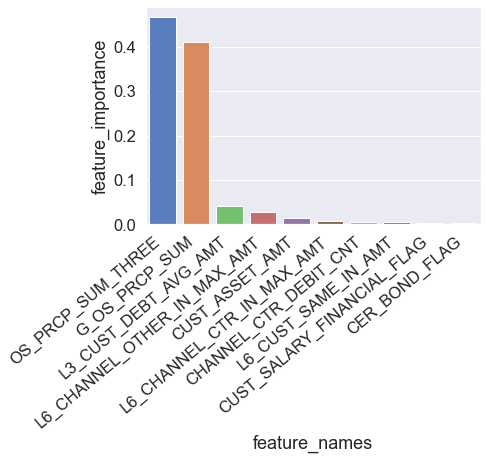

In [45]:
df=pd.DataFrame([feature_impt2,feature_val2]).sort_values(by=1,axis=1,ascending=False)
df=df.T
df.columns = ['feature_names','feature_importance']
ax=sns.barplot(x='feature_names',y='feature_importance',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

### 重要特征与月余额分布

In [96]:
plt.rcParams['axes.unicode_minus']=False

GENDER
性别
LAST_OPEN_TENURE_DAYS
信用卡最近开户时长
G_OS_PRCP_SUM
贷款账户月余额
OS_PRCP_SUM_THREE
三个月内贷款账户月均余额
CUST_ASSET_AMT
资产总额
L3_CUST_DEBT_AVG_AMT
最近3个月客户月平均负债总计
L6_CUST_SAME_IN_AMT
最近六个月客户跨行同名转入月平均金额
DEP_SA_FLAG
持有活期产品标志
DEP_SA_LAST_TENURE_DAYS
活期存款最近开户距今月份
L6DEP_SA_DAY_MAX_IN_AMT
六个月内单日本币单笔最大转入金额
L6DEP_SA_DAY_MAX_OUT_AMT
六个月内单日本币单笔最大转出金额
L6_CHANNEL_CTR_IN_MAX_AMT
柜面转入六个月内最大交易金额
L6_CHANNEL_OTHER_IN_MAX_AMT
其它转入六个月内最大交易金额


<Figure size 432x288 with 0 Axes>

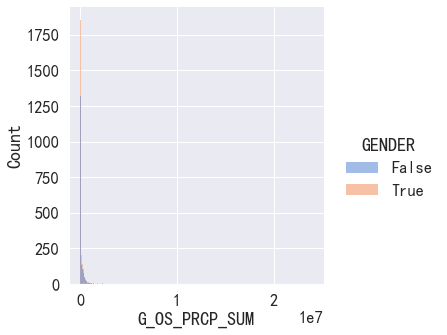

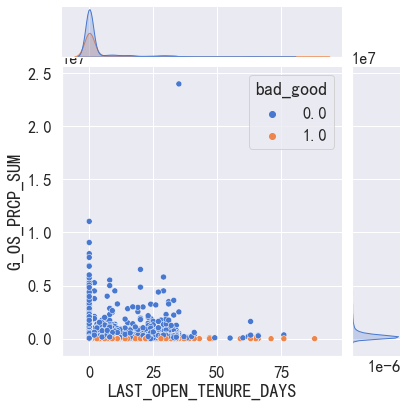

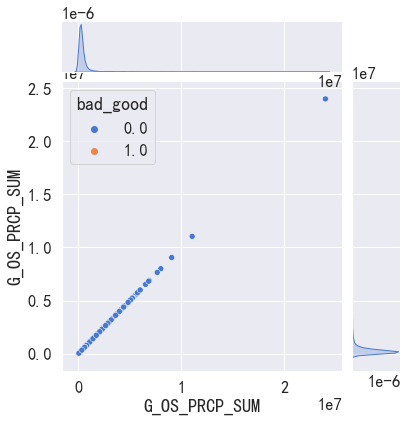

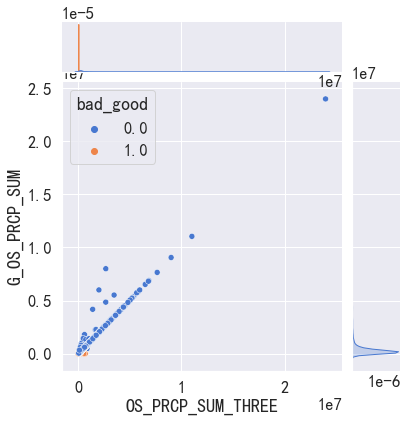

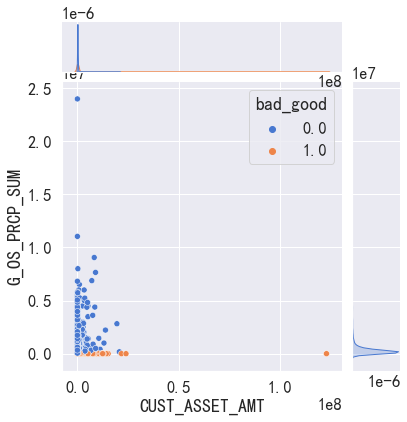

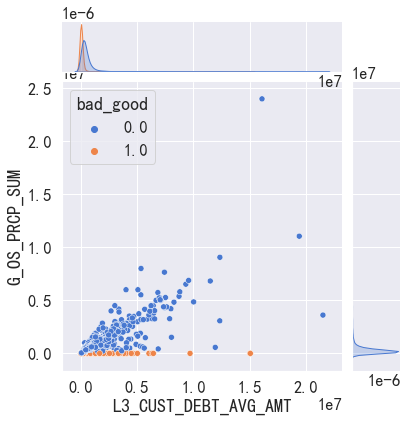

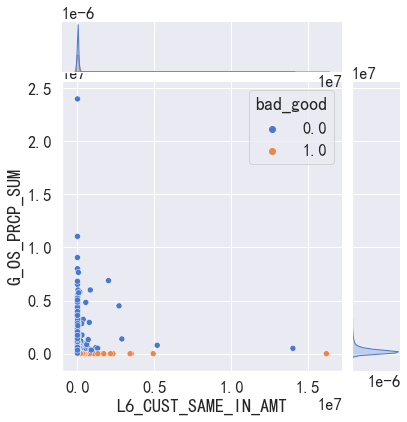

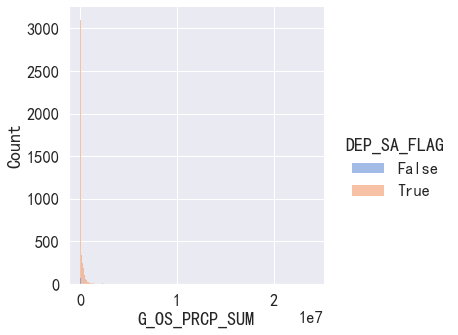

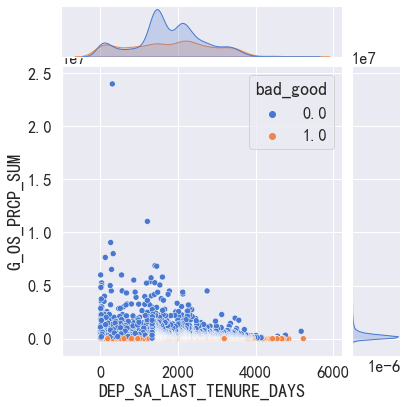

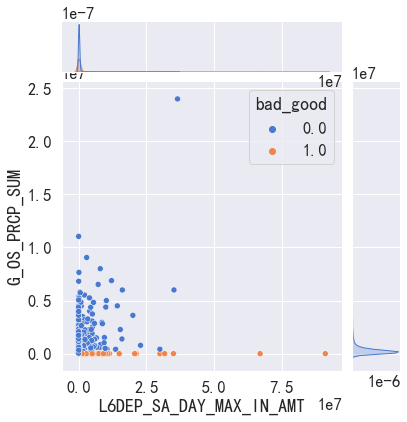

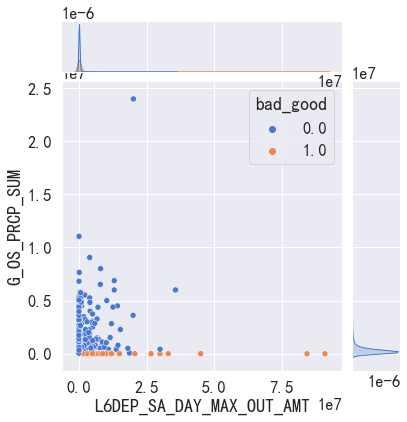

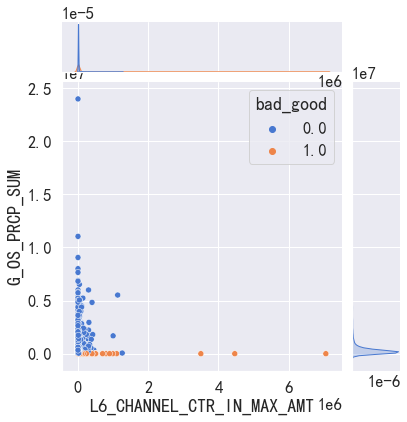

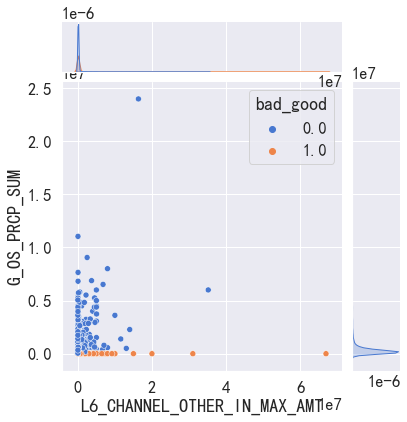

In [99]:
k=len(feature_impt)
for i in range(k):
    plt.figure(i)
    print(feature_impt[i])
    print(feature_chinese[feature_chinese['名称']==feature_impt[i]].iat[0,1])
    if data3.loc[:,feature_impt[i]].dtype=='float64':
        sns.jointplot(data=data3,x=feature_impt[i],y='G_OS_PRCP_SUM',hue='bad_good')
    else :
        sns.displot(data=data3,x='G_OS_PRCP_SUM',hue=feature_impt[i])
plt.show()

G_OS_PRCP_SUM
贷款账户月余额


<Figure size 800x800 with 0 Axes>

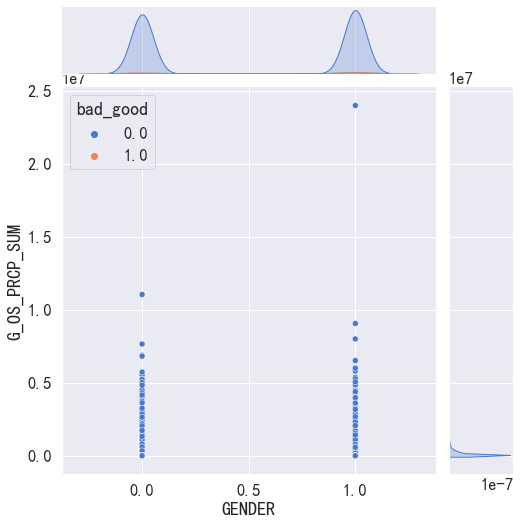

OS_PRCP_SUM_THREE
三个月内贷款账户月均余额


<Figure size 800x800 with 0 Axes>

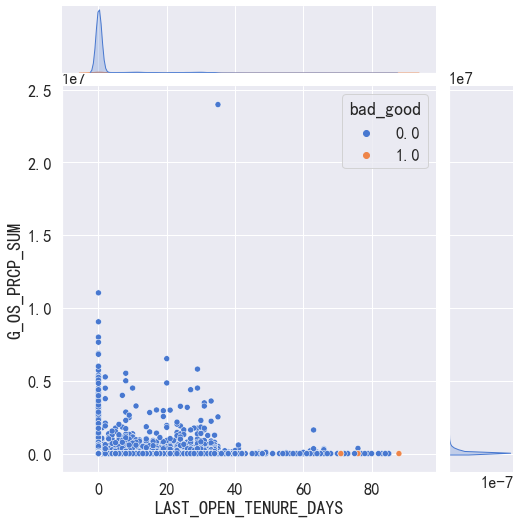

CUST_SALARY_FINANCIAL_FLAG
是否薪资理财


<Figure size 800x800 with 0 Axes>

ValueError: Image size of 551x102304 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x576 with 1 Axes>

CUST_ASSET_AMT
资产总额


<Figure size 800x800 with 0 Axes>

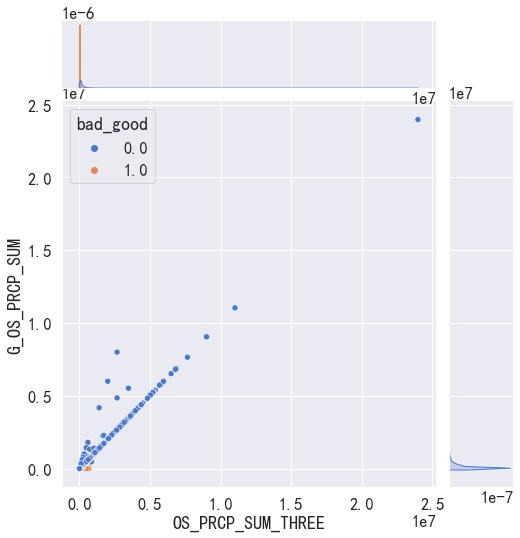

L3_CUST_DEBT_AVG_AMT
最近3个月客户月平均负债总计


<Figure size 800x800 with 0 Axes>

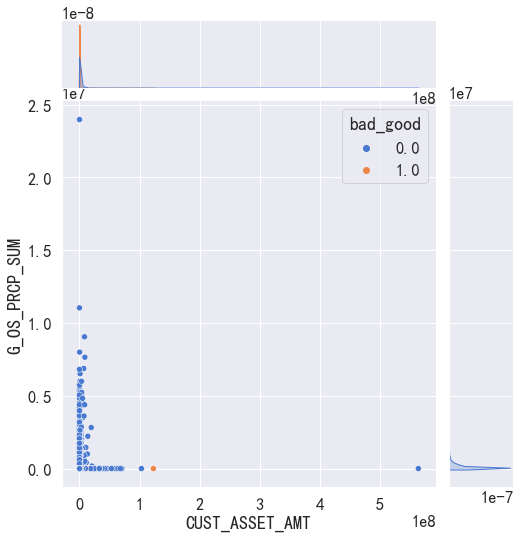

In [123]:
k=len(feature_impt2)
k=5
for i in range(k):
    try:
        plt.figure(i,figsize=(8, 8),dpi=100)
        print(feature_impt2[i])
        print(feature_chinese[feature_chinese['名称']==feature_impt2[i]].iat[0,1])
        if data2[feature_impt2[i]].dtype=='float64':
            g=sns.jointplot(data=data2,x=feature_impt[i],y='G_OS_PRCP_SUM',hue='bad_good')
        else :
            g=sns.displot(data=data2,x='G_OS_PRCP_SUM',hue=feature_impt[i])
        g.fig.set_size_inches(8,8)
        plt.show()
    except OSError:
        pass
    continue    

分类观察

In [103]:
data3_good=data3[data3['bad_good']==0].drop(['bad_good'], 1)
data3_bad=data3[data3['bad_good']==1].drop(['bad_good'], 1)

In [104]:
data3_good.apply(status)

,GENDER,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,...,CHANNEL_AUTO_DTAIN_CNT,CHANNEL_AUTO_DOUTTA_CNT,L3_CHANNEL_AUTO_DTAIN_AVGAMT,L3_CHANNEL_AUTO_DOUTTA_AVGAMT,L3_CHANNEL_AUTO_DTAIN_AVGCNT,L3_CHANNEL_AUTO_DOUTTA_AVGCNT,L6_CHANNEL_AUTO_DTAIN_AVGAMT,L6_CHANNEL_AUTO_DOUTTA_AVGAMT,L6_CHANNEL_AUTO_DTAIN_AVGCNT,L6_CHANNEL_AUTO_DOUTTA_AVGCNT
总数,4721,4721.000000,4.721000e+03,4.721000e+03,4.721000e+03,4721.0,4.721000e+03,4721.000000,4.721000e+03,4721.000000,...,4721.000000,4721.000000,4.721000e+03,4.721000e+03,4721.000000,4721.000000,4.721000e+03,4.721000e+03,4721.000000,4721.000000
最小值,False,0.000000,3.490600e+02,1.163533e+02,5.817667e+01,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
最小值位置,1,17.000000,1.297300e+04,1.297300e+04,1.297300e+04,1.0,1.700000e+01,17.000000,1.700000e+01,17.000000,...,1.000000,17.000000,1.000000e+00,1.700000e+01,1.000000,17.000000,1.000000e+00,1.700000e+01,1.000000,17.000000
25%分位数,0,0.000000,1.257786e+05,1.217839e+05,6.089195e+04,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
中位数,1,0.000000,2.267869e+05,2.221483e+05,1.110742e+05,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%分位数,1,0.000000,4.053474e+05,3.979349e+05,1.989675e+05,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,9.000000e+02,0.000000e+00,0.333333,0.000000,7.166667e+02,0.000000e+00,0.333333,0.000000
均值,0.59839,3.302478,3.970259e+05,3.866490e+05,1.933245e+05,0.0,5.328007e+05,1.537810,1.903139e+05,0.545223,...,0.227282,0.159712,1.468511e+03,1.749622e+03,0.316317,0.216762,1.167641e+03,1.312473e+03,0.222622,0.148380
最大值,True,76.000000,2.398000e+07,2.398000e+07,1.199000e+07,0.0,1.611119e+08,225.000000,7.538116e+07,50.000000,...,14.000000,76.000000,6.666667e+05,2.669667e+06,12.666667,140.666667,4.749998e+05,1.334833e+06,8.833333,87.166667
最大值位数,17,24026.000000,7.815000e+03,7.815000e+03,7.815000e+03,1.0,7.898900e+04,7998.000000,7.898900e+04,7998.000000,...,71278.000000,63522.000000,3.711400e+04,5.940000e+02,15685.000000,63522.000000,4.060800e+04,5.940000e+02,24635.000000,63522.000000
平均绝对偏差,0.480639,5.355393,3.198736e+05,3.116063e+05,1.558031e+05,0.0,9.679968e+05,2.720899,3.504192e+05,0.989741,...,0.389764,0.301156,2.162891e+03,3.204651e+03,0.430154,0.375580,1.689777e+03,2.379850e+03,0.292838,0.249803


In [105]:
data3_bad.apply(status)

,GENDER,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,...,CHANNEL_AUTO_DTAIN_CNT,CHANNEL_AUTO_DOUTTA_CNT,L3_CHANNEL_AUTO_DTAIN_AVGAMT,L3_CHANNEL_AUTO_DOUTTA_AVGAMT,L3_CHANNEL_AUTO_DTAIN_AVGCNT,L3_CHANNEL_AUTO_DOUTTA_AVGCNT,L6_CHANNEL_AUTO_DTAIN_AVGAMT,L6_CHANNEL_AUTO_DOUTTA_AVGAMT,L6_CHANNEL_AUTO_DTAIN_AVGCNT,L6_CHANNEL_AUTO_DOUTTA_AVGCNT
总数,3031,3031.000000,3031.0,3.031000e+03,3.031000e+03,3031.0,3.031000e+03,3031.000000,3.031000e+03,3031.000000,...,3031.000000,3031.000000,3.031000e+03,3.031000e+03,3031.000000,3031.000000,3.031000e+03,3.031000e+03,3031.000000,3031.000000
最小值,False,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
最小值位置,82,48.000000,48.0,4.800000e+01,4.800000e+01,48.0,4.800000e+01,48.000000,4.800000e+01,48.000000,...,48.000000,48.000000,4.800000e+01,4.800000e+01,48.000000,48.000000,4.800000e+01,4.800000e+01,48.000000,48.000000
25%分位数,0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
中位数,1,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%分位数,1,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
均值,0.581986,3.976245,0.0,1.104586e+03,5.522930e+02,0.0,1.141737e+06,2.866381,4.636714e+05,1.010228,...,0.133949,0.189376,9.503435e+02,2.636670e+03,0.164302,0.264929,6.715374e+02,1.765712e+03,0.118278,0.184263
最大值,True,88.000000,0.0,6.666667e+05,3.333333e+05,0.0,3.236414e+08,446.000000,1.876632e+08,166.000000,...,52.000000,25.000000,3.353667e+05,2.560942e+06,45.333333,20.333333,1.676833e+05,1.280471e+06,22.666667,21.833333
最大值位数,48,15967.000000,48.0,2.656400e+04,2.656400e+04,48.0,2.983000e+04,53193.000000,2.983000e+04,53193.000000,...,76084.000000,37952.000000,7.608400e+04,7.239000e+03,76084.000000,30159.000000,7.608400e+04,7.239000e+03,76084.000000,30187.000000
平均绝对偏差,0.486557,6.337790,0.0,2.201154e+03,1.100577e+03,0.0,1.944988e+06,4.635561,8.189078e+05,1.694088,...,0.256762,0.355885,1.718565e+03,4.777566e+03,0.294129,0.455912,1.191691e+03,3.153437e+03,0.206118,0.308101


## 重要特征相关性

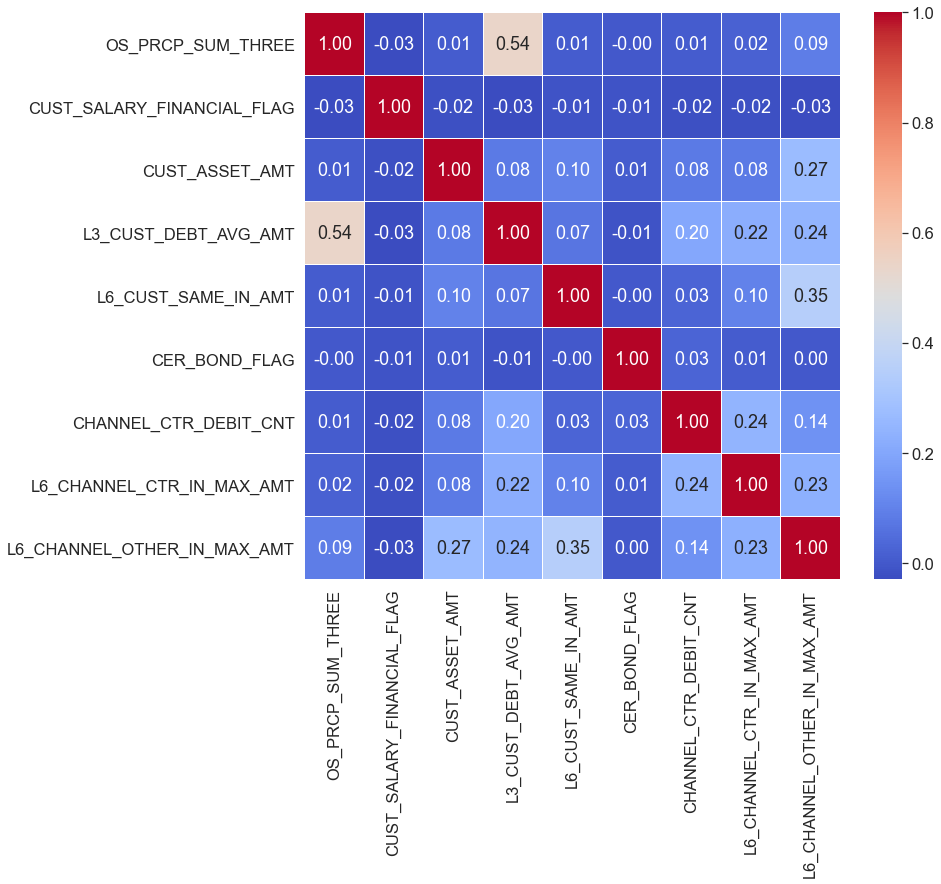

In [49]:
#观察重要特征间的相关关系——不显著
temp=feature_impt2[:]
temp.remove('G_OS_PRCP_SUM')
data_feature=data2.loc[:,temp]
f, ax = plt.subplots(figsize=(12,9)) 
corr = data_feature.corr()
hm = sns.heatmap(round(corr, 2), annot= True, ax=ax, cmap= "coolwarm",fmt= '.2f', linewidths= .05) 
f.subplots_adjust(top= 1) 

# 预测模型

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight


# 预测结果描述
def report(y1_test,y1_predict_v,y1_predict_p):
    print("Confusion matrix (testing):\n {0}\n".format(confusion_matrix(y1_test, y1_predict_v)))
    print("Classification report (testing):\n {0}".format(classification_report(y1_test, y1_predict_v)))

    # 绘制ROC曲线
    fpr_lr1, tpr_lr1, thresholds_lr1 = roc_curve(y1_test, y1_predict_p[:, 1])
    roc_auc_lr1 = auc(fpr_lr1, tpr_lr1)
    print("auc",roc_auc_lr1)
    plt.plot(fpr_lr1, tpr_lr1, lw=2, alpha=.6)
    plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC curve")
    plt.legend(["(AUC {:.4f})".format(roc_auc_lr1)], fontsize=8, loc=2)
    
    conf_mat = confusion_matrix(y1_test, y1_predict_v)

    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

## 基于Xgboost的预测模型

调参

In [119]:
from __future__ import division
import sys
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score
from xgboost import plot_importance

In [121]:
# 把数据集拆分成训练集和测试集
seed = 17
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
#第一步调参：学习率和迭代次数       
param_test1 = {
 'learning_rate':[i for i in np.linspace(0.02,0.12,3)],
 'n_estimators':range(20,100,20)
}#grid.best_params_ {'learning_rate': 0.02, 'n_estimators': 20}
#第二步调参：树的深度和叶子结点的最小权重
param_test2 = {
 'max_depth':range(3,10,2), #3
 'min_child_weight':range(1,6,2) #5
}#grid.best_params_ {'max_depth': 3, 'min_child_weight': 1}
param_test3 = {
'gamma':[i/10.0 for i in range(0,5)] # 0.0
}
param_test4 = {
 'subsample':[i/10.0 for i in range(6,11)], #1.0
 'colsample_bytree':[i/10.0 for i in range(6,11)] #0.7
}
param_test5 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05] #0
}
#Step 6: Reducing Learning Rate:即 降低学习率并增加更多的树
grid = GridSearchCV(estimator = XGBClassifier( 
    learning_rate =0.02, #学习率，控制每次迭代更新权重时的步长，默认0.3;调参：值越小，训练越慢;典型值为0.01-0.2
    n_estimators=20, # 总共迭代的次数，即决策树的个数
    max_depth=3, # 树的深度,默认值为6，典型值3-10;调参：值越大，越容易过拟合；值越小，越容易欠拟合
    min_child_weight=1, # 叶子节点最小权重;默认值为1;调参：值越大，越容易欠拟合；值越小，越容易过拟合
    gamma=0.0, # 惩罚项系数，指定节点分裂所需的最小损失函数下降值
    subsample=1.0, # 训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1;调参：防止overfitting
    colsample_bytree=0.7,# 随机选择N%特征建立决策树;防止overfitting
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1, # 解决样本个数不平衡的问题;正样本的权重，在二分类任务中，当正负样本比例失衡时，设置正样本的权重，模型效果更好。例如，当正负样本比例为1:10时，scale_pos_weight=10.
    seed=27), 
param_grid = param_test6, 
scoring='roc_auc',
n_jobs=4,iid=False, cv=4)
grid.fit(X_train,y_train)

print("grid.best_params_", grid.best_params_)
print("grid.best_score_", grid.best_score_)

clf = grid.best_estimator_
print("grid.best_estimator_:", grid.best_estimator_)
clf.fit(X_train,y_train)


y_train_pred = clf.predict(X_train)
train_predictions = [round(value) for value in y_train_pred]
train_accuracy = accuracy_score(y_train, train_predictions)
train_auc = roc_auc_score(y_train, train_predictions)
train_logloss = log_loss(y_train, train_predictions)
print("train Accuracy: %.2f%%, auc: %.2f, logloss: %.2f" % (train_accuracy * 100.0, train_auc, train_logloss))

y_pred = clf.predict_proba(X_test)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
logloss = log_loss(y_test, predictions)
print("test Accuracy: %.2f%%, auc: %.2f, logloss: %.2f" % (accuracy * 100.0, auc, logloss))



grid.best_params_ {'max_depth': 3, 'min_child_weight': 1}
grid.best_score_ 1.0
grid.best_estimator_: XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.02,
              n_estimators=20, nthread=4, seed=27, subsample=1.0)
train Accuracy: 100.00%, auc: 1.00, logloss: 0.00
test Accuracy: 100.00%, auc: 1.00, logloss: 0.00


采用最优参数建模

time cost 13.647732019424438
Confusion matrix (testing):
 [[22873     0]
 [    1   910]]

Classification report (testing):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22873
         1.0       1.00      1.00      1.00       911

    accuracy                           1.00     23784
   macro avg       1.00      1.00      1.00     23784
weighted avg       1.00      1.00      1.00     23784

auc 1.0


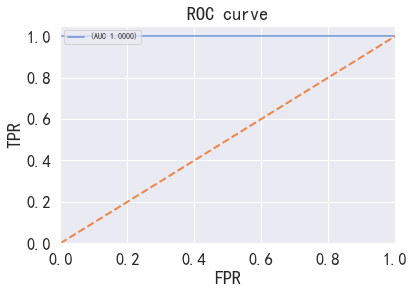

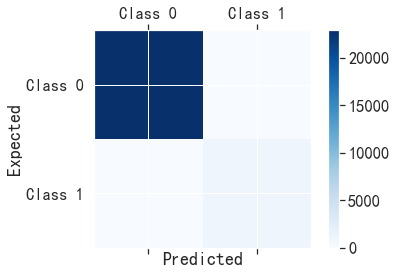

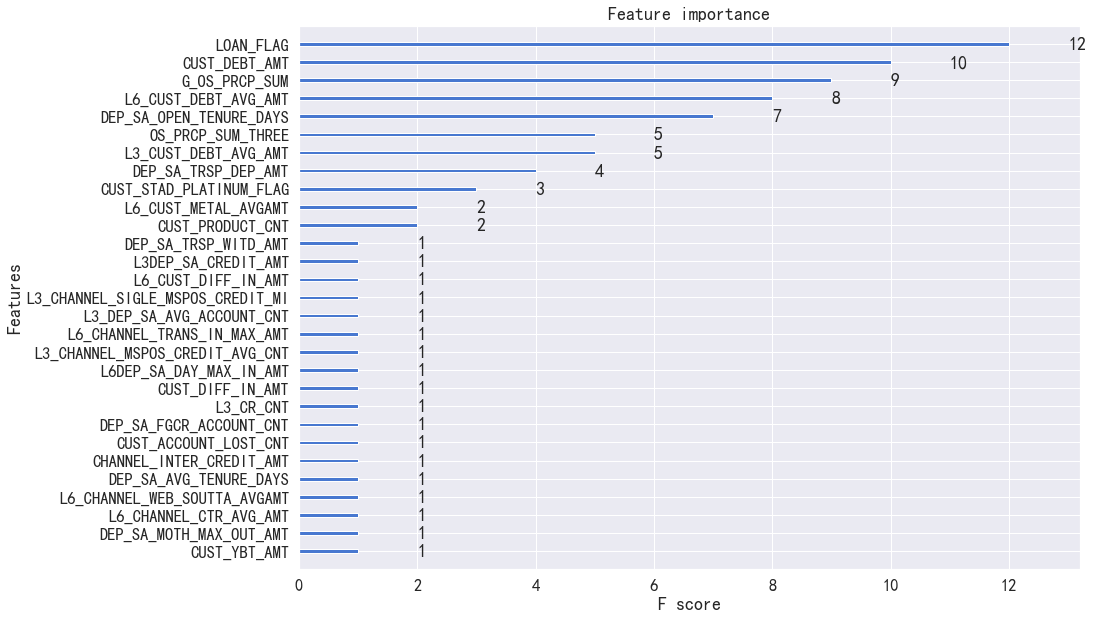

In [120]:
seed = 17
test_size = 0.3
x=data2.drop('bad_good',1)
y=data2['bad_good']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

#model = XGBClassifier(objective= 'binary:logistic')

xgbs = XGBClassifier( 
        learning_rate =0.02, #学习率，控制每次迭代更新权重时的步长，默认0.3;调参：值越小，训练越慢;典型值为0.01-0.2
        n_estimators=20, # 总共迭代的次数，即决策树的个数
        max_depth=3, # 树的深度,默认值为6，典型值3-10;调参：值越大，越容易过拟合；值越小，越容易欠拟合
        min_child_weight=1, # 叶子节点最小权重;默认值为1;调参：值越大，越容易欠拟合；值越小，越容易过拟合
        gamma=0.0, # 惩罚项系数，指定节点分裂所需的最小损失函数下降值
        subsample=0.5, # 训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1;调参：防止overfitting
        colsample_bytree=0.7,# 随机选择N%特征建立决策树;防止overfitting
        objective= 'binary:logistic', 
        nthread=4, 
        scale_pos_weight=1, # 解决样本个数不平衡的问题;正样本的权重，在二分类任务中，当正负样本比例失衡时，设置正样本的权重，模型效果更好。例如，当正负样本比例为1:10时，scale_pos_weight=10.
        seed=127)

time_start=time.time()

xgbs.fit(X_train, y_train)
y_predict_p = xgbs.predict_proba(X_test)
y_predict_v = xgbs.predict(X_test)

time_end=time.time()
print('time cost',time_end-time_start)
report(y_test,y_predict_v,y_predict_p)

from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14,10))
plot_importance(xgbs, ax=ax)
plt.show()


In [113]:
xgbs.get_booster().get_fscore()

{'L3_CUST_DEBT_AVG_AMT': 30,
 'CUST_SALARY_FINANCIAL_FLAG': 13,
 'L6_CHANNEL_OTHER_IN_MAX_AMT': 13,
 'OS_PRCP_SUM_THREE': 10,
 'L6_CUST_SAME_IN_AMT': 10,
 'G_OS_PRCP_SUM': 11,
 'CUST_ASSET_AMT': 20,
 'L6_CHANNEL_CTR_IN_MAX_AMT': 2,
 'CHANNEL_CTR_DEBIT_CNT': 1}

In [114]:
df = pd.DataFrame(xgbs.get_booster().get_fscore(),index=[0]).sort_values(by=0,axis=1,ascending=False)
feature_max=df.columns.values.tolist()
print(feature_max)
print([feature_chinese[feature_chinese['名称']==x].iat[0,1] for x in feature_max])


['L3_CUST_DEBT_AVG_AMT', 'CUST_ASSET_AMT', 'CUST_SALARY_FINANCIAL_FLAG', 'L6_CHANNEL_OTHER_IN_MAX_AMT', 'G_OS_PRCP_SUM', 'OS_PRCP_SUM_THREE', 'L6_CUST_SAME_IN_AMT', 'L6_CHANNEL_CTR_IN_MAX_AMT', 'CHANNEL_CTR_DEBIT_CNT']
['最近3个月客户月平均负债总计', '资产总额', '是否薪资理财', '其它转入六个月内最大交易金额', '贷款账户月余额', '三个月内贷款账户月均余额', '最近六个月客户跨行同名转入月平均金额', '柜面转入六个月内最大交易金额', '本期柜面借方交易笔数']


## 思路一,排除借贷标记与月余额分类

### 基于knn的预测模型

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [52]:
data2.loc[:,feature_impt2].describe()

,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,CUST_ASSET_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_SAME_IN_AMT,CHANNEL_CTR_DEBIT_CNT,L6_CHANNEL_CTR_IN_MAX_AMT,L6_CHANNEL_OTHER_IN_MAX_AMT
count,7.927800e+04,7.927800e+04,7.927800e+04,7.927800e+04,7.927800e+04,79278.000000,7.927800e+04,7.927800e+04
mean,2.364287e+04,2.306715e+04,1.741055e+05,6.702190e+04,1.231810e+04,0.102626,8.462311e+03,1.151478e+05
std,1.983288e+05,1.924334e+05,2.331904e+06,4.704900e+05,2.144336e+05,0.724121,5.862411e+04,7.378903e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.344850e+03,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.600000e+00
50%,0.000000e+00,0.000000e+00,7.571075e+03,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.126196e+01
75%,0.000000e+00,0.000000e+00,5.686650e+04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,5.533528e+03
max,2.398000e+07,2.398000e+07,5.640035e+08,5.051340e+07,3.199529e+07,89.000000,7.060000e+06,6.696958e+07


数据有极端值，先比较StandardScaler，与RobustScaler效果

Confusion matrix (testing):
 [[22843    25]
 [  882    34]]

Classification report (testing):
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     22868
         1.0       0.58      0.04      0.07       916

    accuracy                           0.96     23784
   macro avg       0.77      0.52      0.53     23784
weighted avg       0.95      0.96      0.95     23784

auc 0.6700162332826405


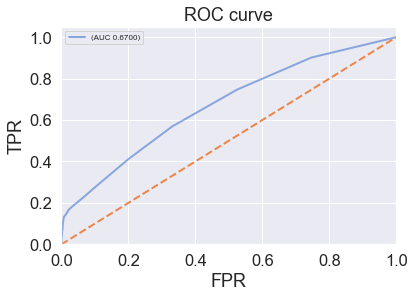

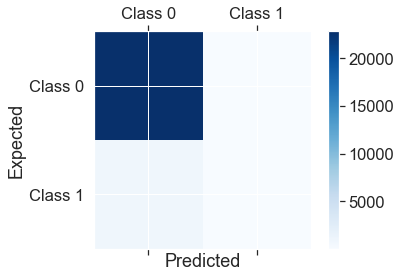

In [53]:
# StandardScaler
# temp=feature_impt2[:]
# temp.remove('G_OS_PRCP_SUM')
x=data2.loc[:,feature_impt2]
y=data2['bad_good']

test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

transfer=StandardScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)



knn=KNeighborsClassifier(n_neighbors=60)
knn.fit(x_train,y_train)
y_predict_p = knn.predict_proba(x_test)
y_predict_v = knn.predict(x_test)

report(y_test,y_predict_v,y_predict_p)

Confusion matrix (testing):
 [[22876     9]
 [  865    34]]

Classification report (testing):
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     22885
         1.0       0.79      0.04      0.07       899

    accuracy                           0.96     23784
   macro avg       0.88      0.52      0.53     23784
weighted avg       0.96      0.96      0.95     23784

auc 0.6938902813141978


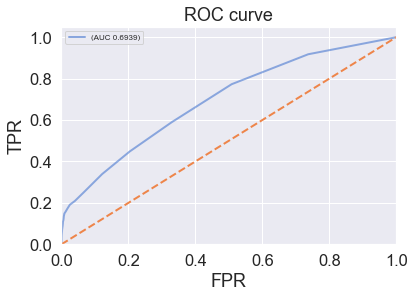

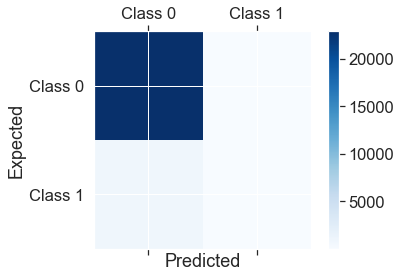

In [54]:
x=data2.loc[:,feature_impt2]
y=data2['bad_good']

test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

transfer=RobustScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)

knn=KNeighborsClassifier(n_neighbors=60)
knn.fit(x_train,y_train)

y_predict_p = knn.predict_proba(x_test)
y_predict_v = knn.predict(x_test)

report(y_test,y_predict_v,y_predict_p)

RobustScaler保留数据极端值的特征，效果更好。

再看只对借贷客户的预测效果

Confusion matrix (testing):
 [[1220  211]
 [ 149  746]]

Classification report (testing):
               precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1431
         1.0       0.78      0.83      0.81       895

    accuracy                           0.85      2326
   macro avg       0.84      0.84      0.84      2326
weighted avg       0.85      0.85      0.85      2326

auc 0.9391444042334735


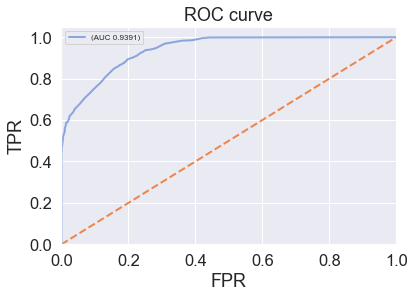

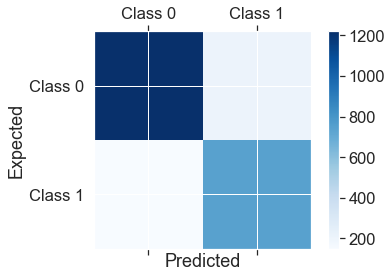

In [55]:
x=data3.loc[:,feature_impt2]
y=data3['bad_good']

test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

transfer=RobustScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)

knn=KNeighborsClassifier(n_neighbors=60)
knn.fit(x_train,y_train)

y_predict_p = knn.predict_proba(x_test)
y_predict_v = knn.predict(x_test)

report(y_test,y_predict_v,y_predict_p)

knn对均衡样本(发生贷款客户)的拟合效果更好

可以考虑建立贷款客户的knn模型。

实际操作时，若用户选择贷款，银行可以用模型估计违约可能性。

但若对所有客户使用此模型评估，等于假设所有客户贷款的条件下做出预测。由2.2.4特征筛选的结果，选择贷款与否的条件分布不同。预测结果可能有偏

故对发生借贷的knn评估模型调参

In [56]:
param_dict={"n_neighbors":range(5,50,5),"weights":['uniform','distance']}
gsearch1 = GridSearchCV(estimator = KNeighborsClassifier(p=2),
   param_grid = param_dict, scoring='roc_auc',iid=False, cv=5)
gsearch1.fit(x_train, y_train)

#网格搜索结果查看
print("最佳参数：\n",gsearch1.best_params_)
print("最佳结果:\n",gsearch1.best_score_)#验证集中的结果
print("最佳估计器:\n",gsearch1.best_estimator_)
print("交叉验证结果:\n",gsearch1.cv_results_)

最佳参数：
 {'n_neighbors': 15, 'weights': 'distance'}
最佳结果:
 0.9533511305222617
最佳估计器:
 KNeighborsClassifier(n_neighbors=15, weights='distance')
交叉验证结果:
 {'mean_fit_time': array([0.01735978, 0.02187881, 0.01874719, 0.02187028, 0.01933351,
       0.01607347, 0.01874709, 0.02500334, 0.01873922, 0.02187128,
       0.02187047, 0.02320838, 0.03123813, 0.02229605, 0.01561522,
       0.02499599, 0.01561537, 0.02188015]), 'std_fit_time': array([2.20366044e-03, 7.64512934e-03, 6.24780447e-03, 7.65130718e-03,
       6.05695478e-03, 9.42282612e-04, 6.22644773e-03, 1.24887441e-02,
       6.23273861e-03, 7.65331231e-03, 7.65232002e-03, 6.99163821e-03,
       2.90022850e-05, 7.33221829e-03, 1.60652376e-05, 7.65249508e-03,
       1.42522471e-05, 7.66185227e-03]), 'mean_score_time': array([0.02397618, 0.02499294, 0.02810907, 0.03145261, 0.03066144,
       0.03278933, 0.03146954, 0.03435826, 0.03437343, 0.03412404,
       0.0374907 , 0.03236222, 0.03274689, 0.03594456, 0.0472806 ,
       0.03934894, 0.0482

Confusion matrix (testing):
 [[1272  147]
 [ 174  733]]

Classification report (testing):
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1419
         1.0       0.83      0.81      0.82       907

    accuracy                           0.86      2326
   macro avg       0.86      0.85      0.85      2326
weighted avg       0.86      0.86      0.86      2326

auc 0.9529608020928756


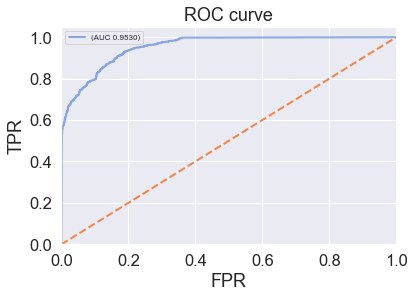

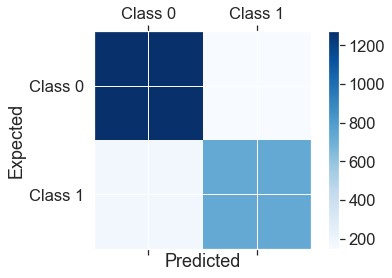

In [57]:
x=data3.loc[:,feature_impt2]
y=data3['bad_good']

test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

transfer=RobustScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)

time_start=time.time()

knn=KNeighborsClassifier(n_neighbors=15, weights='distance')
knn.fit(x_train,y_train)
y_predict_p = knn.predict_proba(x_test)
y_predict_v = knn.predict(x_test)

time_end=time.time()
print('time cost',time_end-time_start)

report(y_test,y_predict_v,y_predict_p)

### 基于l2逻辑回归的预测模型

In [58]:
from sklearn.linear_model import LogisticRegression

Confusion matrix (testing):
 [[1416   20]
 [ 137  753]]

Classification report (testing):
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1436
         1.0       0.97      0.85      0.91       890

    accuracy                           0.93      2326
   macro avg       0.94      0.92      0.93      2326
weighted avg       0.94      0.93      0.93      2326

auc 0.957151575850521


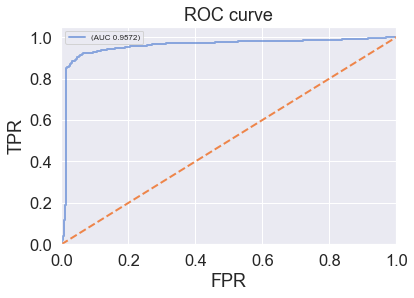

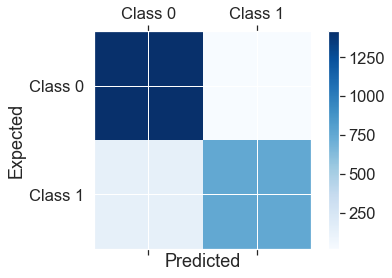

In [59]:
x=data3.loc[:,feature_impt2]
x=x.drop('G_OS_PRCP_SUM',1)
y=data3['bad_good']

test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

lr=LogisticRegression(penalty='l2',tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,class_weight='balanced', random_state=None, solver='saga', max_iter=100, multi_class='auto')
lr.fit(x_train,y_train)

y_predict_p = lr.predict_proba(x_test)
y_predict_v = lr.predict(x_test)

report(y_test,y_predict_v,y_predict_p)

In [60]:
param_dict={"C":np.logspace(-2,2,5),'penalty':['l1','l2'],'class_weight':['balanced',None]}#solver='lbfgs'
gsearch1 = GridSearchCV(estimator = LogisticRegression(penalty='l2',tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,random_state=None, max_iter=100, multi_class='auto'),
   param_grid = param_dict, scoring='roc_auc',iid=False, cv=5)
gsearch1.fit(x_train, y_train)

#网格搜索结果查看
print("最佳参数：\n",gsearch1.best_params_)
print("最佳结果:\n",gsearch1.best_score_)#验证集中的结果
print("最佳估计器:\n",gsearch1.best_estimator_)
print("交叉验证结果:\n",gsearch1.cv_results_)

最佳参数：
 {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}
最佳结果:
 0.9949303907375857
最佳估计器:
 LogisticRegression(C=0.01)
交叉验证结果:
 {'mean_fit_time': array([0.00079837, 0.03877358, 0.00312448, 0.03826818, 0.        ,
       0.04373889, 0.00312462, 0.03402538, 0.00312457, 0.03649683,
       0.00081429, 0.02858682, 0.        , 0.03436651, 0.        ,
       0.03124309, 0.        , 0.03749127, 0.00312443, 0.02975087]), 'std_fit_time': array([3.99184466e-04, 1.18358274e-02, 6.24895096e-03, 7.15987153e-03,
       0.00000000e+00, 1.16899649e-02, 6.24923706e-03, 5.03991031e-03,
       6.24914169e-03, 6.80361995e-03, 4.08382245e-04, 8.42812304e-03,
       0.00000000e+00, 6.24864103e-03, 0.00000000e+00, 5.22348936e-07,
       0.00000000e+00, 7.65331228e-03, 6.24885559e-03, 2.98407141e-03]), 'mean_score_time': array([0.        , 0.0007978 , 0.        , 0.0008091 , 0.        ,
       0.00624886, 0.        , 0.00312452, 0.        , 0.00491962,
       0.        , 0.00785131, 0.        , 0.00312438, 0. 

Confusion matrix (testing):
 [[1442   19]
 [   1  864]]

Classification report (testing):
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1461
         1.0       0.98      1.00      0.99       865

    accuracy                           0.99      2326
   macro avg       0.99      0.99      0.99      2326
weighted avg       0.99      0.99      0.99      2326

auc 0.9895819238545142


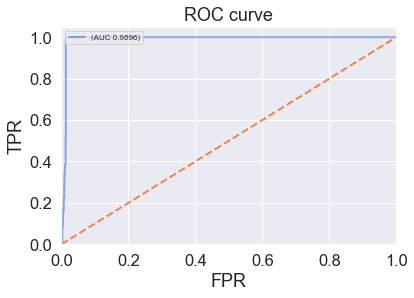

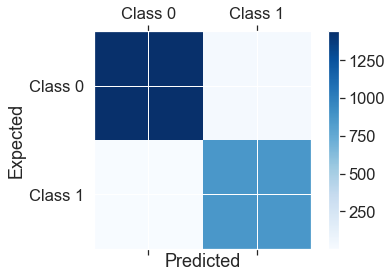

In [61]:
x=data3.loc[:,feature_impt2]
x=x.drop('G_OS_PRCP_SUM',1)
y=data3['bad_good']

test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

time_start=time.time()

lr=LogisticRegression(C=0.1, class_weight='balanced')
lr.fit(x_train,y_train)
y_predict_p = lr.predict_proba(x_test)
y_predict_v = lr.predict(x_test)

time_end=time.time()
print('time cost',time_end-time_start)

report(y_test,y_predict_v,y_predict_p)

In [62]:
# 系数绝对值最大的前10个特征
coef_max=list(np.abs(-lr.coef_[0]).argsort()[:10])
feature_max=[feature_name[x] for x in coef_max]
print(feature_max)
print([feature_chinese[feature_chinese['名称']==x].iat[0,1] for x in feature_max])

['guozhai_flag', 'LAST_OPEN_TENURE_DAYS', 'L3_DR_AMT', 'G_OS_PRCP_SUM', 'OS_PRCP_SUM_THREE', 'DR_AMT', 'OS_PRCP_SUM_SIX', 'L3_DR_CNT', 'GENDER']
['国债', '信用卡最近开户时长', '最近三个月转入金额', '贷款账户月余额', '三个月内贷款账户月均余额', '本月转入金额', '六个月内贷款账户月均余额', '最近三个月转入笔数', '性别']


Lasso picked 9 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using ridge Model')

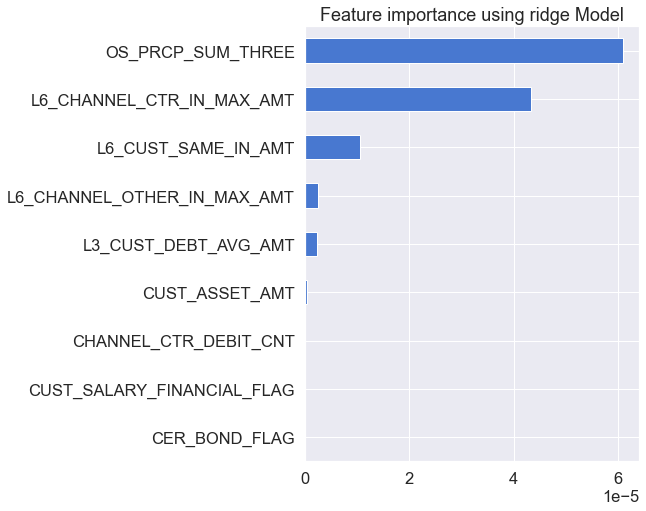

In [64]:
coef = pd.Series(lr.coef_[0] ,index = x.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = np.abs(coef).sort_values()
plt.figure(figsize=(6,8))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using ridge Model")

## 思路2,对月余额回归

In [85]:
## 回归结果可视化
from matplotlib import rcParams
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
rcParams['font.sans-serif'] = 'SimHei'

def reg_report(y_test,y_pred):
    fig = plt.figure(figsize=(10,6))
    plt.plot(range(y_test.shape[0]),y_test,color="green", linewidth=1.5, linestyle="-")
    plt.plot(range(y_test.shape[0]),y_pred,color="yellow", linewidth=1.5, linestyle="-.")
    plt.legend(['真实值','预测值'])
    plt.show()

    ##评价回归模型
    print('Boston数据线性回归模型的平均绝对误差为：',mean_absolute_error(y_test,y_pred))
    print('Boston数据线性回归模型的均方误差为：',mean_squared_error(y_test,y_pred))
    print('Boston数据线性回归模型的中值绝对误差为：',median_absolute_error(y_test,y_pred))
    print('Boston数据线性回归模型的可解释方差值为：',explained_variance_score(y_test,y_pred))
    print('Boston数据线性回归模型的R方值为：',r2_score(y_test,y_pred))

### XGBRegressor

In [70]:
from xgboost import XGBRegressor
import sys
import xgboost
from sklearn.metrics import confusion_matrix,classification_report, roc_curve, auc,accuracy_score,accuracy_score,log_loss,roc_auc_score
from xgboost import plot_importance

In [75]:
feature_impt2

['G_OS_PRCP_SUM',
 'OS_PRCP_SUM_THREE',
 'CUST_SALARY_FINANCIAL_FLAG',
 'CUST_ASSET_AMT',
 'L3_CUST_DEBT_AVG_AMT',
 'L6_CUST_SAME_IN_AMT',
 'CER_BOND_FLAG',
 'CHANNEL_CTR_DEBIT_CNT',
 'L6_CHANNEL_CTR_IN_MAX_AMT',
 'L6_CHANNEL_OTHER_IN_MAX_AMT']

[23:31:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
grid.best_params_ {'reg_alpha': 0.001}
grid.best_score_ 0.9592871498991281
grid.best_estimator_: XGBRegressor(colsample_bytree=0.7, gamma=0.0, learning_rate=0.045,
             n_estimators=260, nthread=4, reg_alpha=0.001, subsample=1.0)
[23:31:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<train>


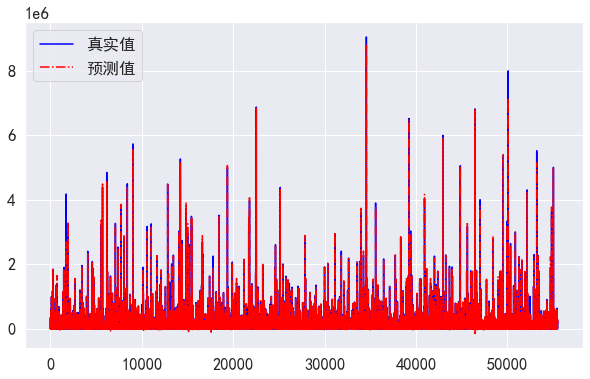

Boston数据线性回归模型的平均绝对误差为： 1834.4477215654429
Boston数据线性回归模型的均方误差为： 200192019.70358184
Boston数据线性回归模型的中值绝对误差为： 166.05575561523438
Boston数据线性回归模型的可解释方差值为： 0.9936730632737492
Boston数据线性回归模型的R方值为： 0.9936730623410668
____________________________________________
<test>


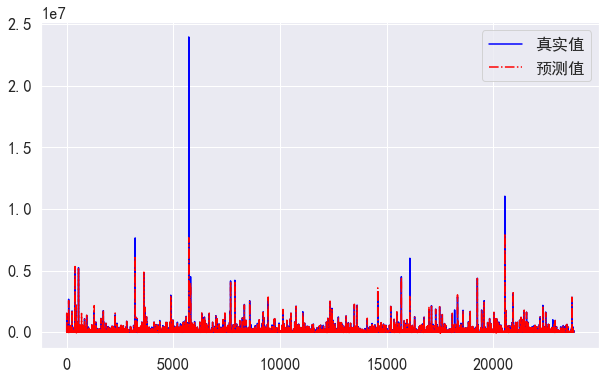

Boston数据线性回归模型的平均绝对误差为： 3130.8030396046306
Boston数据线性回归模型的均方误差为： 12324641197.540382
Boston数据线性回归模型的中值绝对误差为： 166.05575561523438
Boston数据线性回归模型的可解释方差值为： 0.7848424989594616
Boston数据线性回归模型的R方值为： 0.7848331337794308


In [101]:
x=data2.loc[:,feature_impt2]
x=x.drop('G_OS_PRCP_SUM',1)#['G_OS_PRCP_SUM','LOAN_FLAG','bad_good']
y=data2['G_OS_PRCP_SUM']


test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
      
param_test1 = {
 'learning_rate':[i for i in np.linspace(0.02,0.12,5)],
 'n_estimators':range(80,280,20)
}#grid.best_params_ {'learning_rate': =0.045, 'n_estimators': 260}
param_test2 = {
 'max_depth':range(3,10,2), #3
 'min_child_weight':range(1,6,2) #5
}#grid.best_params_ {'max_depth': 3, 'min_child_weight': 1}
param_test3 = {
'gamma':[i/10.0 for i in range(0,5)] # 0.0
}
param_test4 = {
 'subsample':[i/10.0 for i in range(6,11)], #1.0
 'colsample_bytree':[i/10.0 for i in range(6,11)] #0.7
}
param_test5 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05] #0
}
grid = GridSearchCV(estimator = XGBRegressor( 
    learning_rate =0.045, #学习率，控制每次迭代更新权重时的步长，默认0.3;调参：值越小，训练越慢;典型值为0.01-0.2
    n_estimators=260, # 总共迭代的次数，即决策树的个数
    max_depth=3, # 树的深度,默认值为6，典型值3-10;调参：值越大，越容易过拟合；值越小，越容易欠拟合
    min_child_weight=1, # 叶子节点最小权重;默认值为1;调参：值越大，越容易欠拟合；值越小，越容易过拟合
    gamma=0.0, # 惩罚项系数，指定节点分裂所需的最小损失函数下降值
    subsample=1.0, # 训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1;调参：防止overfitting
    colsample_bytree=0.7,# 随机选择N%特征建立决策树;防止overfitting 
    nthread=4, 
    scale_pos_weight=1, # 解决样本个数不平衡的问题;正样本的权重，在二分类任务中，当正负样本比例失衡时，设置正样本的权重，模型效果更好。例如，当正负样本比例为1:10时，scale_pos_weight=10.
    reg_alpha=0.001), 
param_grid = param_test5, 
n_jobs=4,iid=False, cv=4)

grid.fit(X_train,y_train)

print("grid.best_params_", grid.best_params_)
print("grid.best_score_", grid.best_score_)

clf = grid.best_estimator_
print("grid.best_estimator_:", grid.best_estimator_)
clf.fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('<train>')
reg_report(y_train,y_train_pred)

print('____________________________________________')
print("<test>")
reg_report(y_test,y_test_pred)

[23:37:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
time cost 3.793323278427124
<train>


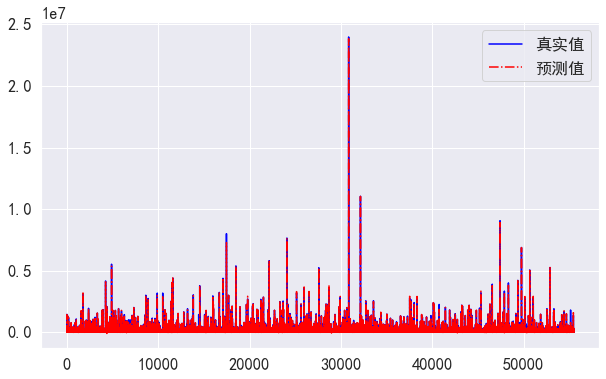

Boston数据线性回归模型的平均绝对误差为： 1621.5047909507405
Boston数据线性回归模型的均方误差为： 149500710.92171282
Boston数据线性回归模型的中值绝对误差为： 86.55435180664062
Boston数据线性回归模型的可解释方差值为： 0.9963779559203434
Boston数据线性回归模型的R方值为： 0.9963779555070383
____________________________________________
<test>


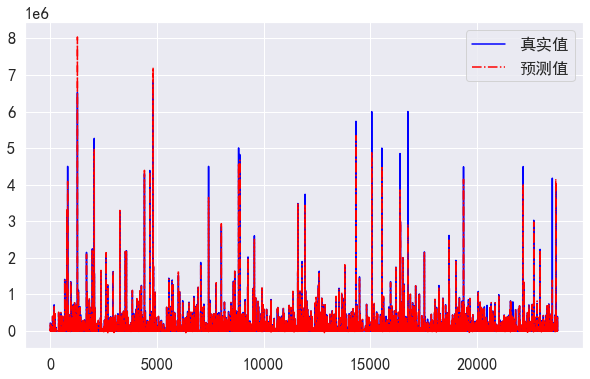

Boston数据线性回归模型的平均绝对误差为： 2136.366662443119
Boston数据线性回归模型的均方误差为： 1188689394.3368256
Boston数据线性回归模型的中值绝对误差为： 86.55435180664062
Boston数据线性回归模型的可解释方差值为： 0.9658464810836168
Boston数据线性回归模型的R方值为： 0.9658456411693247


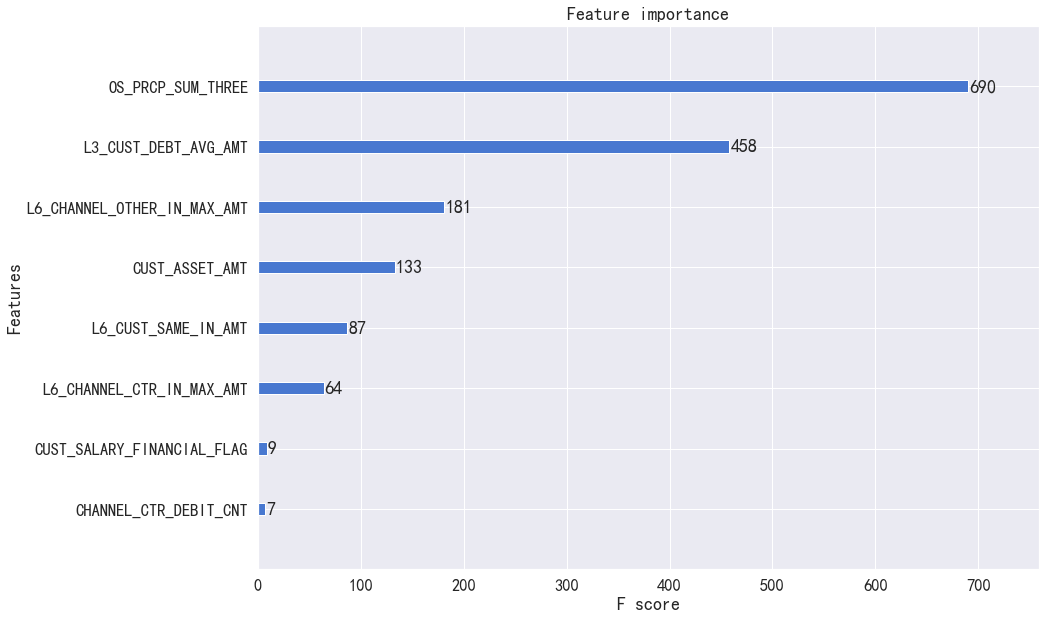

In [106]:
x=data2.loc[:,feature_impt2]
x=x.drop('G_OS_PRCP_SUM',1)#['G_OS_PRCP_SUM','LOAN_FLAG','bad_good']
y=data2['G_OS_PRCP_SUM']

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

time_start=time.time()

xgbr= XGBRegressor( 
    learning_rate =0.045, #学习率，控制每次迭代更新权重时的步长，默认0.3;调参：值越小，训练越慢;典型值为0.01-0.2
    n_estimators=260, # 总共迭代的次数，即决策树的个数
    max_depth=3, # 树的深度,默认值为6，典型值3-10;调参：值越大，越容易过拟合；值越小，越容易欠拟合
    min_child_weight=1, # 叶子节点最小权重;默认值为1;调参：值越大，越容易欠拟合；值越小，越容易过拟合
    gamma=0.0, # 惩罚项系数，指定节点分裂所需的最小损失函数下降值
    subsample=1.0, # 训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1;调参：防止overfitting
    colsample_bytree=0.7,# 随机选择N%特征建立决策树;防止overfitting 
    nthread=4, 
    scale_pos_weight=1, # 解决样本个数不平衡的问题;正样本的权重，在二分类任务中，当正负样本比例失衡时，设置正样本的权重，模型效果更好。例如，当正负样本比例为1:10时，scale_pos_weight=10.
    reg_alpha=0.001)
xgbr.fit(X_train,y_train)
y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)

time_end=time.time()
print('time cost',time_end-time_start)

print('<train>')
reg_report(y_train,y_train_pred)

print('____________________________________________')
print("<test>")
reg_report(y_test,y_test_pred)

fig, ax = plt.subplots(figsize=(14,10))
plot_importance(xgbr, ax=ax)
plt.show()